# What is Juptyer?

The Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and narrative text. Uses include: data cleaning and transformation, numerical simulation, statistical modeling, data visualization, machine learning, and much more.

See http://jupyter.org/ for further details

## Why is this useful:

Perfect way to analyse and document any experiment, to directly create a visualisation, and to follow tutorials. E.g. check out the [gallery of interesting notebooks](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks).

You will have your code analysis and your documentation in one place an you can directly export and store as needed.

## Alternatives

* https://colab.research.google.com/ (some limited GPU)
* You can install also locally

## L-CAS's installation

* currently in test phase (running on Marc's desktop computer, so don't use ;-) )
* runs a dockerised jupyterhub with GitHub OAuth authentication (Marc has to enable login for individual people)
* every user account is completely isolated (using docker)
* All resources are shared and *not* resource limited
* Jupyter runs within the university network, so has access to many internal addresses (e.g. you own PC)

In [2]:
# You can use python inline. E.g. you can define functions to be used later:

# import environment and expose in jupyter env
# this only works when shellvars is installed as it is in L-CAS Juptyer images
# https://github.com/LCAS/jupyterhub-deploy-docker/blob/master/singleuser/Dockerfile#L100

import shellvars
from os import environ

def loadenv(filename='/opt/ros/kinetic/setup.bash'):
    vs = shellvars.get_vars(filename)
    for v in vs:
        print('%s=%s' % (v.decode("utf-8"), str(vs[v].decode("utf-8"))))
        environ[v.decode("utf-8")] = str(vs[v].decode("utf-8"))

In [3]:
# you can call these functions easily
# (This example is a good way to load environment variables from a config file)

loadenv('/opt/ros/kinetic/setup.bash')

ROS_DISTRO=kinetic
PYTHONPATH=/opt/ros/kinetic/lib/python2.7/dist-packages
ROS_ETC_DIR=/opt/ros/kinetic/etc/ros
ROS_ROOT=/opt/ros/kinetic/share/ros
ROS_MASTER_URI=http://localhost:11311
ROS_VERSION=1
ROS_PACKAGE_PATH=/opt/ros/kinetic/share
PKG_CONFIG_PATH=/opt/ros/kinetic/lib/pkgconfig
PATH=/opt/ros/kinetic/bin:/opt/conda/envs/python2/bin:/opt/conda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin
CMAKE_PREFIX_PATH=/opt/ros/kinetic
LD_LIBRARY_PATH=/opt/ros/kinetic/lib


Jupyter Notebooks allow to mix code, data, documentation, etc. This text is written in markdown and nicely formatted. You can also include image etc: 

![](https://i0.wp.com/lcas.lincoln.ac.uk/wp/wp-content/uploads/2012/05/cropped-lcas_logo_150dpi-720x987.png?w=100%25)

Or any other valid markdown formatting, e.g. a table:

| like | a | table |
| --- | --- | --- |
| with | a | row |

There are many different kernels available, supporting different languages like **Octave (Matlab), Python 2/3, R, bash,...**

There are also so-called *"magics"* (starting with `%`) which can be listed with the command `%lsmagic`

In [7]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python  %%python

You can also execute shell commands in your current environment:

In [13]:
!ls
!echo "pwd: `pwd`"

barplots.ipynb	     LGM welcome.ipynb	    Test.ipynb
Bash test.ipynb      module analysis.ipynb  Tips and Tricks.ipynb
Bloom release.ipynb  octave test.ipynb	    Untitled.ipynb
bloom-tmp	     octave-workspace	    untitled.txt
eager.ipynb	     r-test.ipynb	    work
iliad		     shellvars-py	    workspace
iliad_metapackage    SPQReL.ipynb
pwd: /home/jovyan


You can also have "cell magic", i.e. making an entire cell for a different language:

In [29]:
%%bash

for f in *.ipynb; do
    echo `basename "$f" .ipynb`
done

barplots
Bash test
Bloom release
eager
LGM welcome
module analysis
octave test
r-test
SPQReL
Test
Tips and Tricks
Untitled


# Some Visuals

stolen from https://github.com/rasbt/matplotlib-gallery

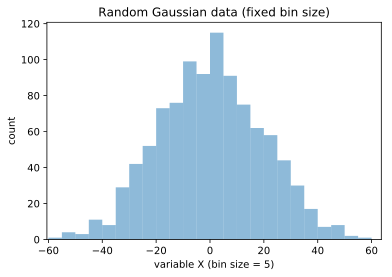

In [19]:
%matplotlib inline
# chose you favourite output format (can directly generate PDF for your paper!)
# %config InlineBackend.figure_formats = ['svg','png', 'pdf']
# SVG is best for viewing in browser, change to PDF to generate for papers
%config InlineBackend.figure_formats = ['svg']

import numpy as np
import random
from matplotlib import pyplot as plt

data = np.random.normal(0, 20, 1000) 

# fixed bin size
bins = np.arange(-100, 100, 5) # fixed bin size

plt.xlim([min(data)-5, max(data)+5])

plt.hist(data, bins=bins, alpha=0.5)
plt.title('Random Gaussian data (fixed bin size)')
plt.xlabel('variable X (bin size = 5)')
plt.ylabel('count')

plt.show()

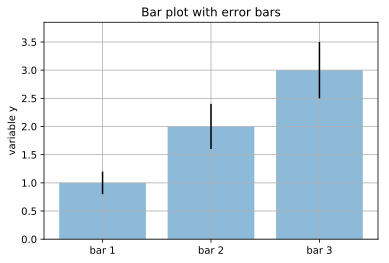

In [20]:

# input data
mean_values = [1, 2, 3]
variance = [0.2, 0.4, 0.5]
bar_labels = ['bar 1', 'bar 2', 'bar 3']

# plot bars
x_pos = list(range(len(bar_labels)))
plt.bar(x_pos, mean_values, yerr=variance, align='center', alpha=0.5)

plt.grid()

# set height of the y-axis
max_y = max(zip(mean_values, variance)) # returns a tuple, here: (3, 5)
plt.ylim([0, (max_y[0] + max_y[1]) * 1.1])

# set axes labels and title
plt.ylabel('variable y')
plt.xticks(x_pos, bar_labels)
plt.title('Bar plot with error bars')

plt.show()

# Some tricks and tips (fun stuff)

e.g. a terminal can also be launched to install new things, e.g. using
`pip install --user pymongo==2.8` (if installed as `--user` it will be preserved, even, if you shut down your server)

In [21]:
# Here is a fun trick to embed a terminal (though you can use it the standard way, too)
from IPython.display import IFrame
from os import environ
IFrame('https://lcas.lincoln.ac.uk/user/%s/terminals/1' % environ.get('JUPYTERHUB_USER'), width=800, height=500)

## Read password interactively

In [31]:
from getpass import getpass; password=getpass('your secret')
# can now be used in shell commands (obviously, normally not printed):
!echo "you entered: $password"

you entered: sdfsdf


In [21]:
%%python2
import sys
from std_msgs.msg import String
import os
sys.path.append('/usr/lib/python2.7/dist-packages')
import rospy
import jupyros
import ipywidgets as widgets

rospy.init_node('test')
print jupyros.widget_for_msg(String, 'foo')

